In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from graphviz import Source
from sklearn import metrics
from sklearn import tree, ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix,
    roc_curve,
    auc)
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

### Loading Data

In [4]:
train = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)

#remove the Id column as we will not use it
train = train.iloc[:,1:]
train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


### Understanding Data

In [5]:
train.isnull().sum().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [7]:
train.columns

for col in train.columns:
    if col in train.filter(regex='Wilderness|Type').columns:
        train[col] = train[col].astype('category')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Elevation                           15120 non-null  int64   
 1   Aspect                              15120 non-null  int64   
 2   Slope                               15120 non-null  int64   
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64   
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64   
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64   
 6   Hillshade_9am                       15120 non-null  int64   
 7   Hillshade_Noon                      15120 non-null  int64   
 8   Hillshade_3pm                       15120 non-null  int64   
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64   
 10  Wilderness_Area1                    15120 non-null  category
 11  Wilderness_Area2            

In [9]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>],
       [<AxesSubplot:title={'center':'Hillshade_9am'}>,
        <AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

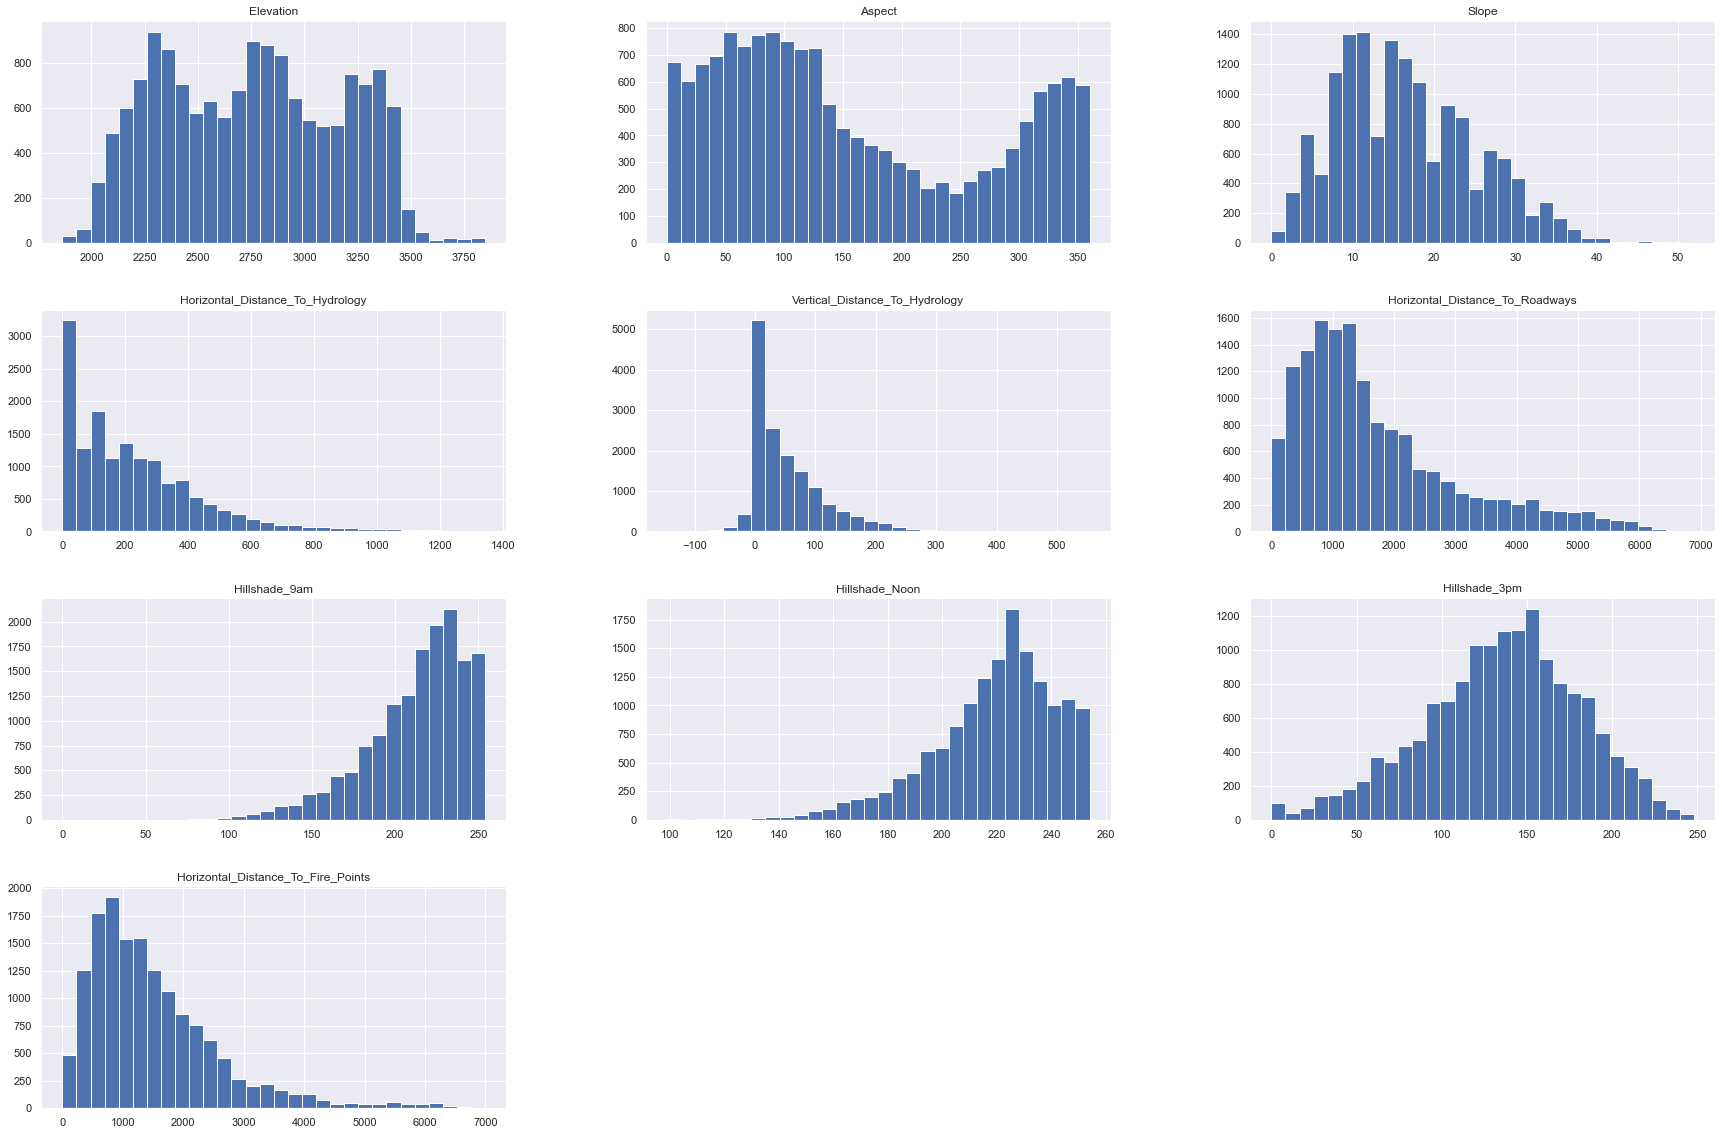

In [10]:
train.hist(figsize=(30,20), bins=30)

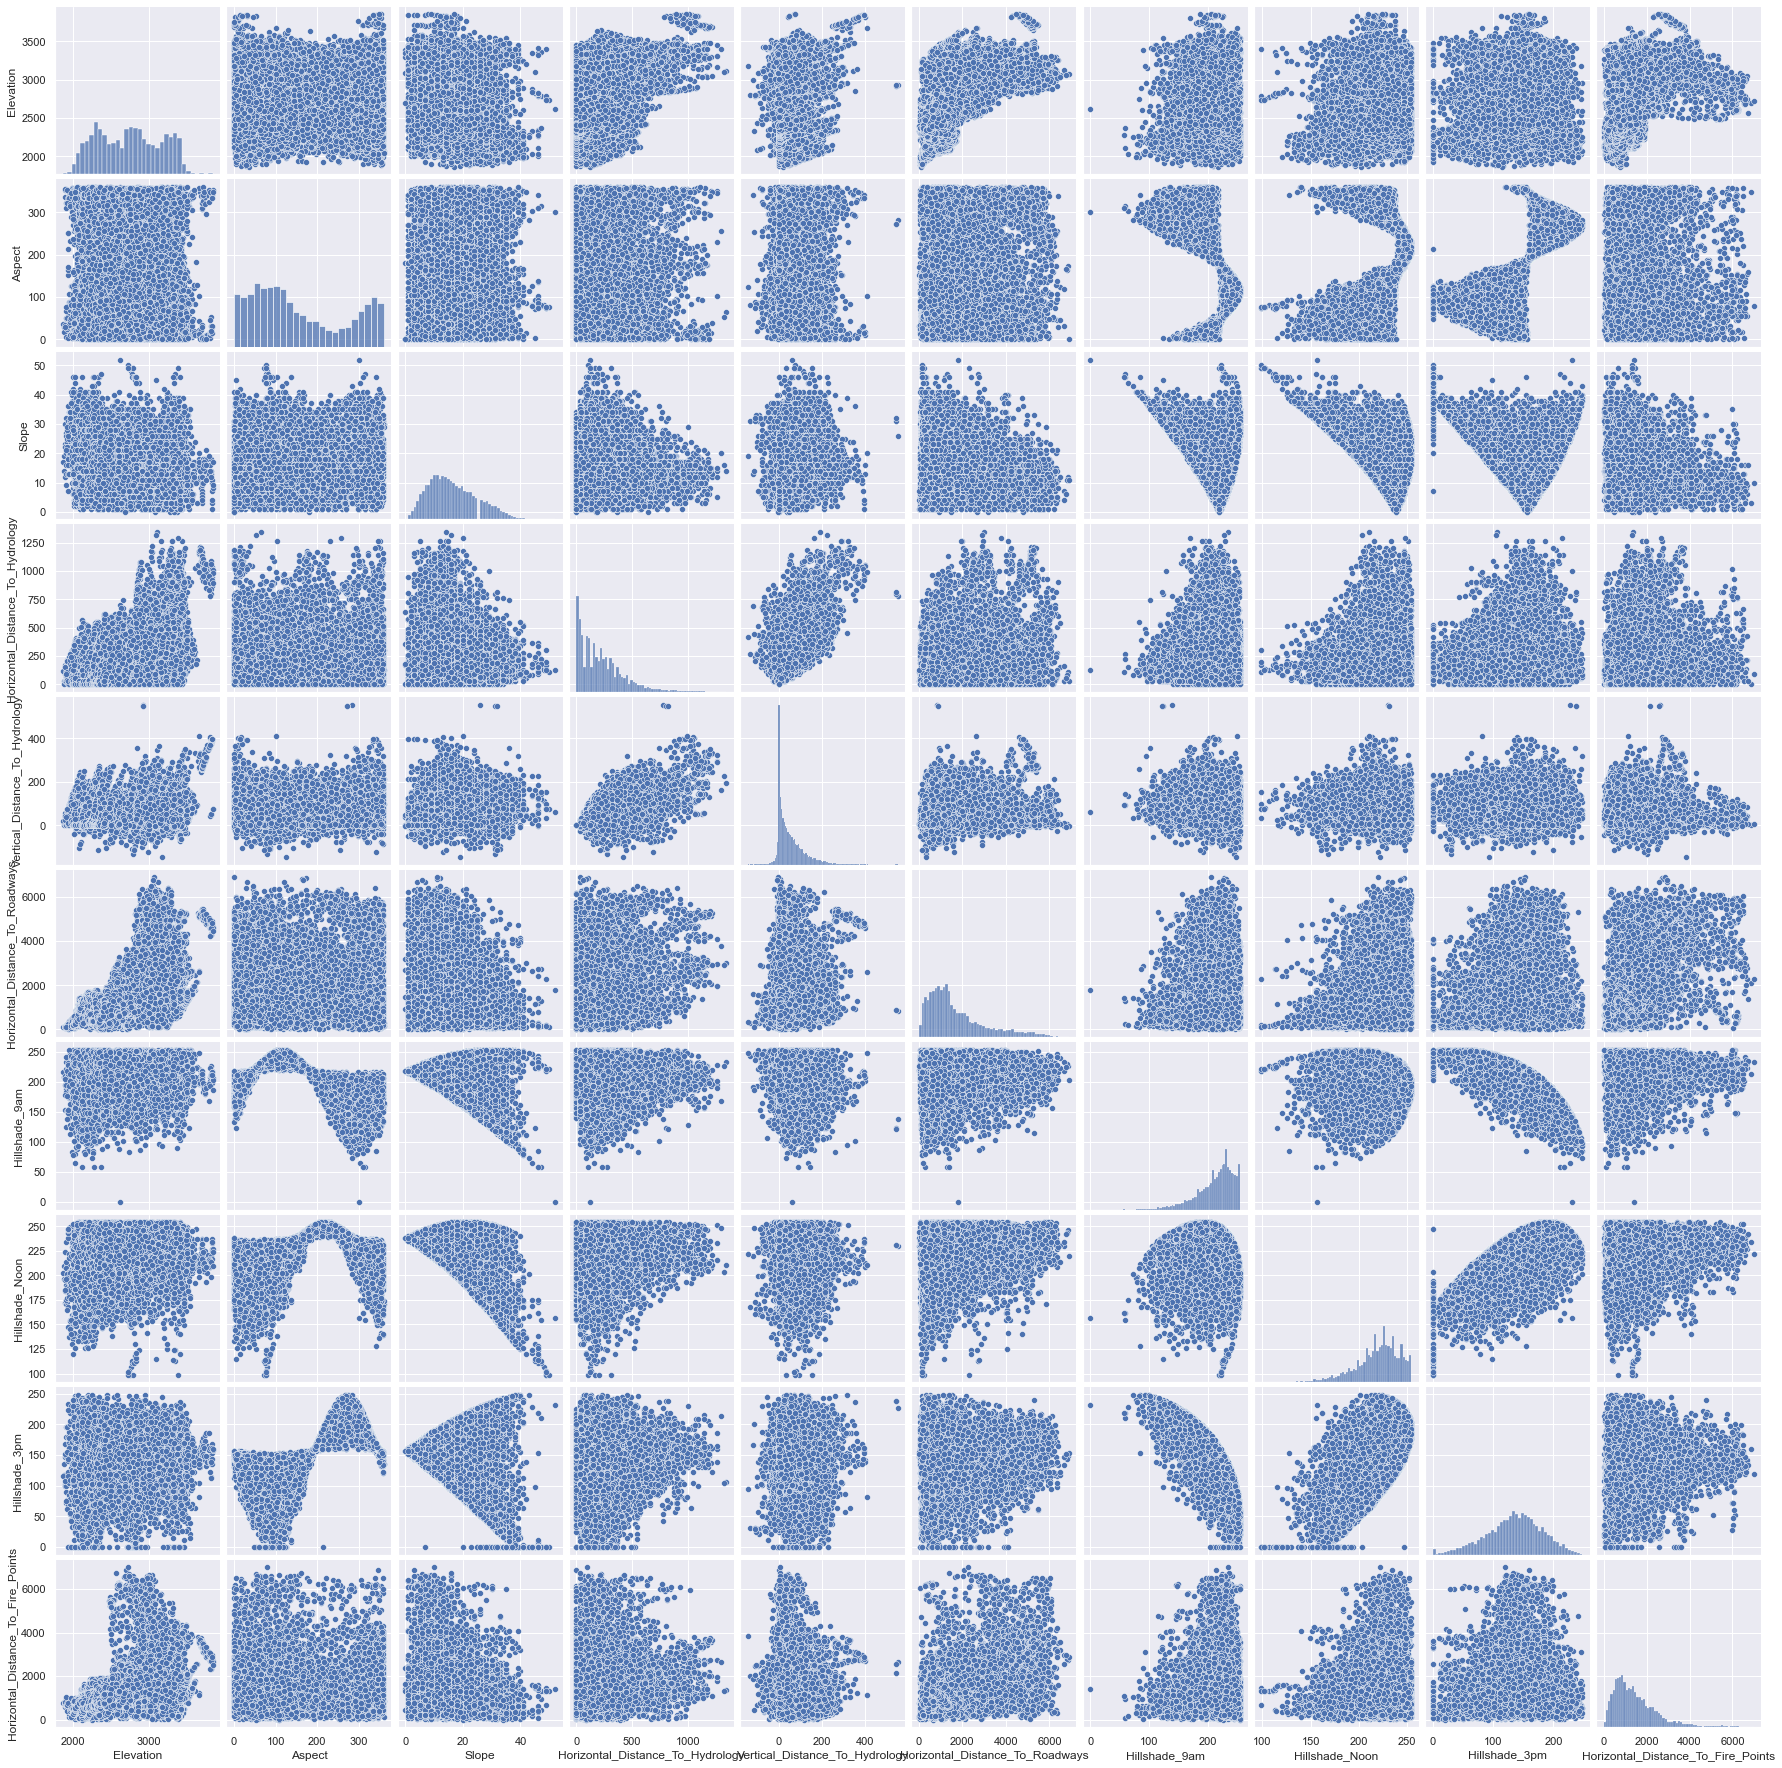

In [11]:
sns.pairplot(train[train.describe().columns[:10]])

In [12]:
corr = train.corr()
corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


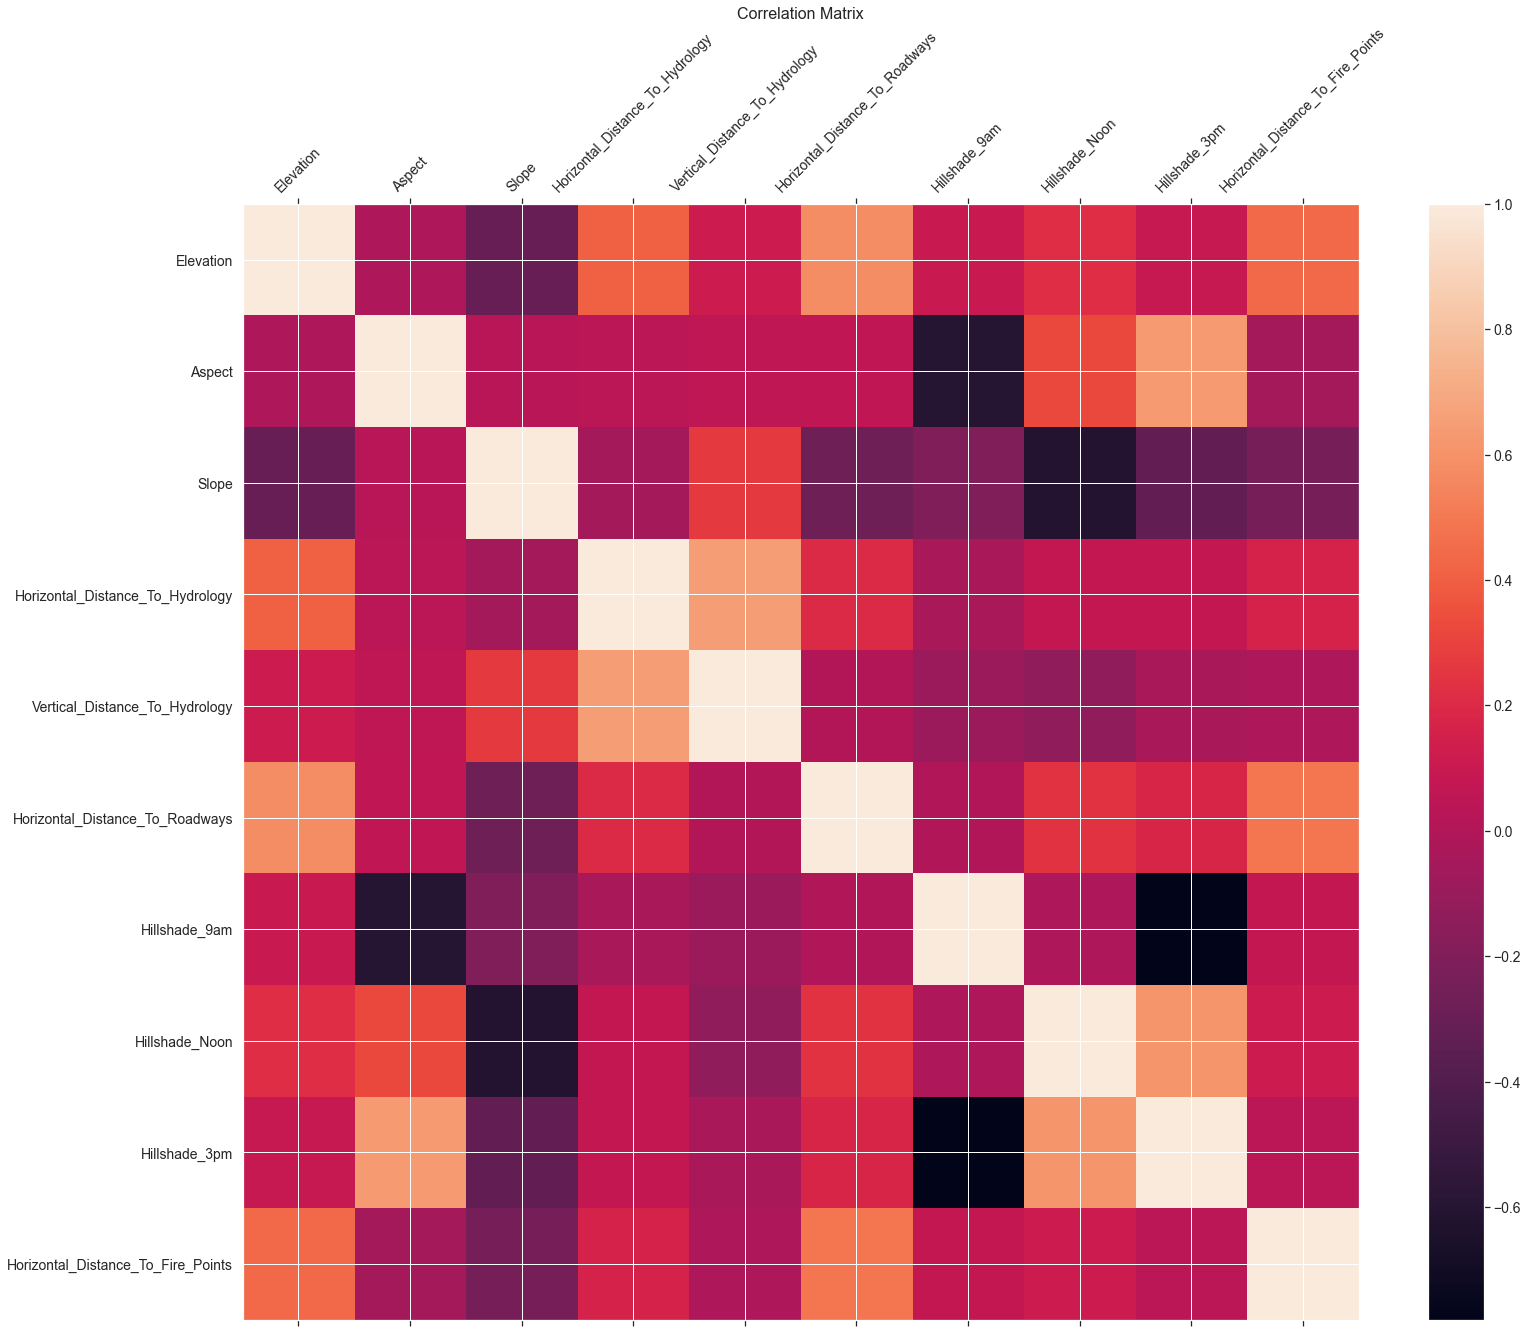

In [13]:
f = plt.figure(figsize=(25, 20))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [14]:
x = train.iloc[:, :-1]
y = train.loc[:, "Cover_Type"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [39]:
#Logistic Regression Baseline Model
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

initial_lm_mod = linear_model.LogisticRegression(multi_class='multinomial',max_iter=10000, penalty='none')
print("Baseline model with Accuracy = {:.4}".format(np.mean(cross_val_score(initial_lm_mod, x_train, y_train, cv=5))))

C:\Users\ivanh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ivanh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Baseline model with Accuracy = 0.6524


C:\Users\ivanh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#DecisionTreeClassifier Baseline

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_hat = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_hat)
accuracy

0.7837301587301587

In [16]:
#RandomForestClassifier Baseline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8670634920634921

<AxesSubplot:>

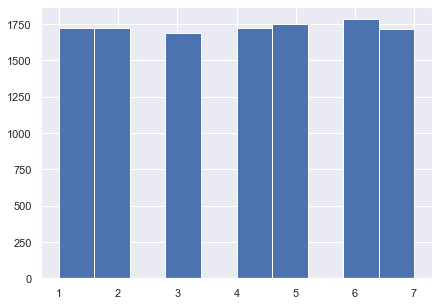

In [17]:
# Checking out training set contains "uniform" distribution for target variable
y_train.hist(figsize=(7,5))

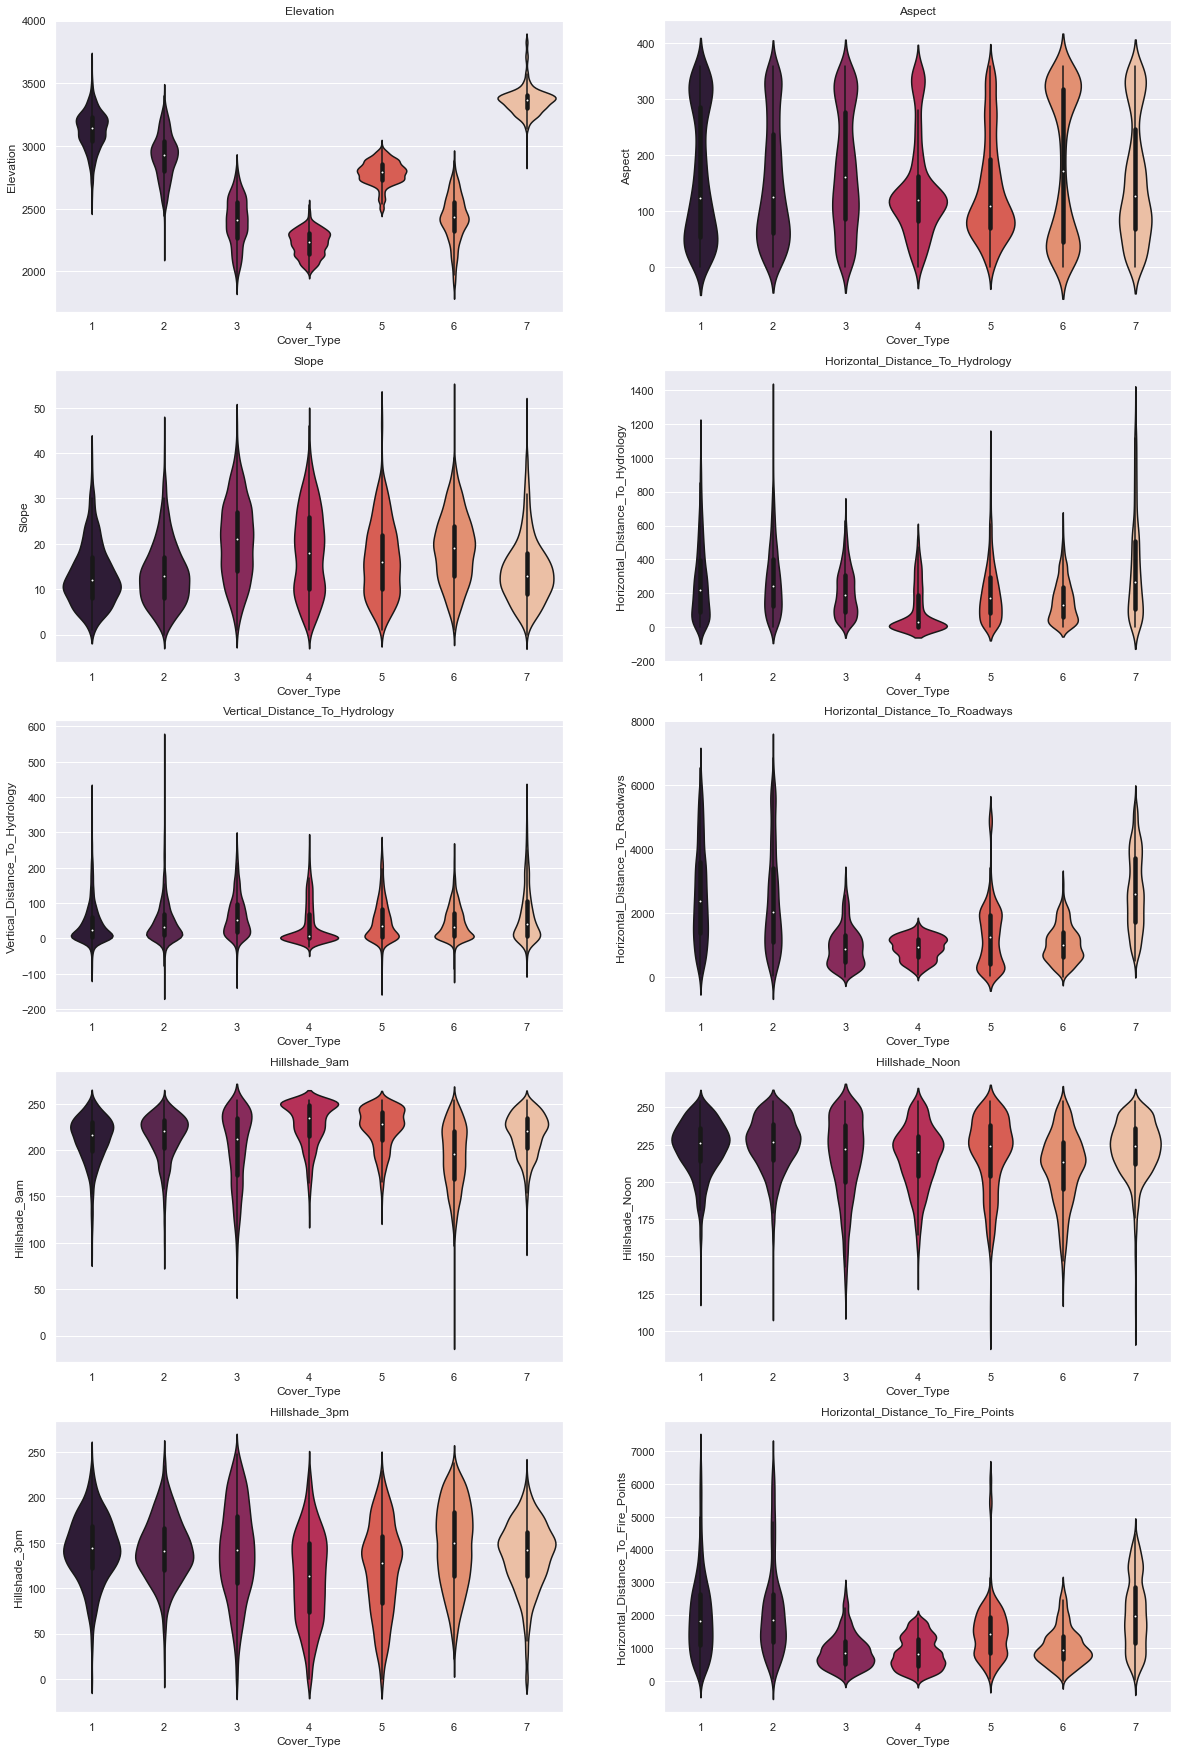

In [18]:
#Get a better understanding of which features seem to help the most predict the different Cover_Types

fig, axes = plt.subplots(5, 2, figsize=(20,20))
plt.subplots_adjust(top=1.3)
                    
axes = axes.ravel()

cols = train.columns[0:10] #select only the columns that are not binary 

for i, feature in enumerate(cols):
    sns.violinplot(x=train['Cover_Type'], y=train[feature], ax=axes[i], palette = 'rocket')
    axes[i].set_title(feature)

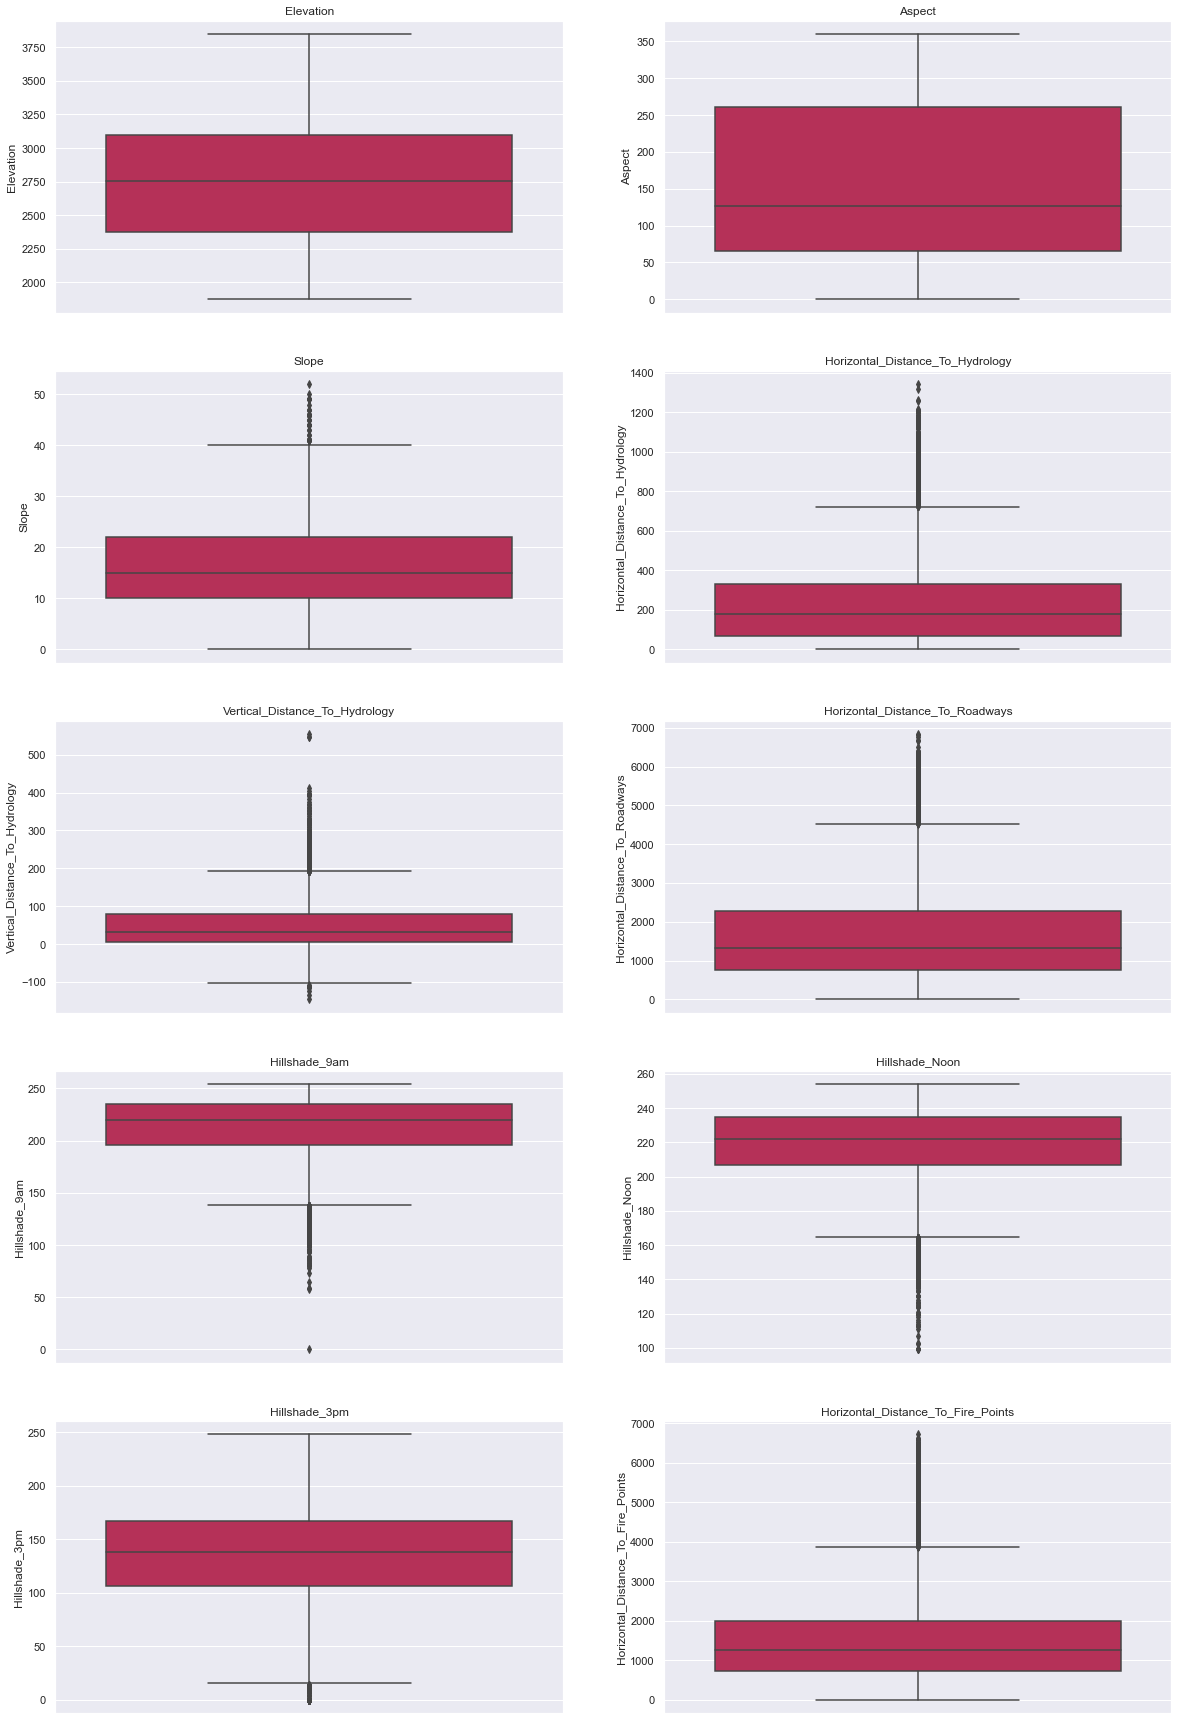

In [19]:
# Box-plot to take a look at outliers

fig, axes = plt.subplots(5, 2, figsize=(20,20))
plt.subplots_adjust(top=1.3)
                    
axes = axes.ravel()

cols = x_train.columns[0:10] #select only the numerical columns that are not binary 

for i, feature in enumerate(cols):
    sns.boxplot(y=x_train[feature], ax=axes[i], palette = 'rocket')
    axes[i].set_title(feature)

In [20]:
#Since the min and max of these features are between the index given in the dataset (0-255) we will keep them as is.
print(x_train['Hillshade_9am'].min())
print(x_train['Hillshade_9am'].max())
print(x_train['Hillshade_Noon'].min())
print(x_train['Hillshade_Noon'].max())
print(x_train['Hillshade_3pm'].min())
print(x_train['Hillshade_3pm'].max())

0
254
99
254
0
248


In [21]:
#Create function to find and replace outliers from outlier_features

def find_replace_outliers(data):
    
    outlier_features = ['Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
    
    for feature in outlier_features:

        q75,q25 = np.percentile(data[feature],[75,25])
        intr_qr = q75-q25

        maximum = q75+(1.5*intr_qr)
        minimum = q25-(1.5*intr_qr)

        data[feature] = np.where(
            (data[feature] > maximum), maximum, np.where(
            (data[feature] < minimum), minimum, data[feature]))

In [22]:
find_replace_outliers(x_train)

C:\Users\ivanh\AppData\Local\Temp/ipykernel_36276/2336048662.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = np.where(


In [23]:
categorical_features = list(x_train.select_dtypes(include=["category"]).columns)
numerical_features_to_scale = list(set(x_train.columns) - set(categorical_features))

numerical_features_to_scale

['Hillshade_Noon',
 'Slope',
 'Hillshade_3pm',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Aspect',
 'Elevation',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Hillshade_9am']

In [24]:
#Scaler

minmax_scaler_transformer = ColumnTransformer(
    [
        (
            "min_max_scaler",
            MinMaxScaler(),
            list(numerical_features_to_scale)
        )
    ],
    remainder="passthrough"
)

In [25]:
#Scaled Dataset

x_train_scaled = pd.DataFrame(
    minmax_scaler_transformer.fit_transform(x_train),
    columns=x_train.columns
)

x_test_scaled = pd.DataFrame(
    minmax_scaler_transformer.transform(x_test),
    columns=x_train.columns
)

In [26]:
for col in x_train_scaled.columns:
    if col in x_train_scaled.filter(regex='Wilderness|Type').columns:
        x_train_scaled[col] = x_train_scaled[col].astype('category')

for col in x_test_scaled.columns:
    if col in x_test_scaled.filter(regex='Wilderness|Type').columns:
        x_test_scaled[col] = x_test_scaled[col].astype('category')

In [27]:
categorical_features = list(x_train_scaled.select_dtypes(include=["category"]).columns)
numerical_features = list(set(x_train_scaled.columns) - set(categorical_features))

In [28]:
#DecisionTreeClassifier after dealing with outliers and scaling features

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=17)
dtc.fit(x_train_scaled, y_train)
y_hat = dtc.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_hat)
accuracy

0.7797619047619048

In [29]:
#DecisionTreeClassifier after dealing with outliers (no scaling)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=17)
dtc.fit(x_train, y_train)
y_hat = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_hat)
accuracy

0.7820767195767195

In [30]:
feat_imp = dtc.feature_importances_
features = x_train.columns
feat_imp_dt = pd.DataFrame({
    "feature": features, 
    "importance": feat_imp
}).sort_values(by="importance", ascending=False).reset_index(drop=True)
feat_imp_dt

,feature,importance
0,Elevation,0.412053
1,Horizontal_Distance_To_Roadways,0.086753
2,Horizontal_Distance_To_Fire_Points,0.079416
3,Hillshade_9am,0.067462
4,Horizontal_Distance_To_Hydrology,0.067343
5,Aspect,0.038672
6,Vertical_Distance_To_Hydrology,0.038405
7,Hillshade_Noon,0.031970
8,Hillshade_3pm,0.027648
9,Slope,0.020684


In [31]:
#RandomForestClassifier after dealing with outliers and scaling features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train_scaled, y_train)
y_hat = rfc.predict(x_test_scaled)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8604497354497355

In [32]:
#RandomForestClassifier after dealing with outliers (no scaling)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8597883597883598

### Feature Engineering

In [33]:
def feature_engineering(data):
    
    #Create feature 'Direct_Distance_To_Hydrology' by calculating hypothenus using 'Horizontal_Distance_To_Hydrology' and 'Vertical_Distance_To_Hydrology'
    
    data['Direct_Distance_To_Hydrology'] = np.where(
            (data['Horizontal_Distance_To_Hydrology'] == 0),
            data['Vertical_Distance_To_Hydrology'],
            np.where(
                (data['Vertical_Distance_To_Hydrology'] == 0),
                data['Horizontal_Distance_To_Hydrology'],
                (((data['Horizontal_Distance_To_Hydrology']**2)+(data['Vertical_Distance_To_Hydrology']**2))**0.5)*(data['Vertical_Distance_To_Hydrology']/abs(data['Vertical_Distance_To_Hydrology']))))
    
    #Create feature 'Rockness' using the information provided in Kaggle to categorize Soil Rockness as Undefined_Complex, Rubbly, Stony, Very_Stony or Extremely_Stony_Bouldery
    
    data['Rockness'] = 0

    Undefined_Complex = [7, 15, 8, 14, 16, 17, 19, 20, 21, 23]
    for num in Undefined_Complex:
        a = num
        data['Rockness'] = np.where(data[f'Soil_Type{a}']==1, 'Undefined_Complex', data['Rockness'])

    Rubbly = [3, 4, 5, 10, 11, 13]
    for num in Rubbly:
        a = num
        data['Rockness'] = np.where(data[f'Soil_Type{a}']==1, 'Rubbly', data['Rockness'])

    Stony = [6, 12]
    for num in Stony:
        a = num
        data['Rockness'] = np.where(data[f'Soil_Type{a}']==1, 'Stony', data['Rockness'])

    Very_Stony = [2, 9, 18, 26]
    for num in Very_Stony:
        a = num
        data['Rockness'] = np.where(data[f'Soil_Type{a}']==1, 'Very_Stony', data['Rockness'])

    Extremely_Stony_Bouldery = [1, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 22, 35]
    for num in Extremely_Stony_Bouldery:
        a = num
        data['Rockness'] = np.where(data[f'Soil_Type{a}']==1, 'Extremely_Stony_Bouldery', data['Rockness'])
        
    #Setting 'Rockness' as a ordinal categorical variable
    
    data['Rockness'] = np.where(data['Rockness'] == 'Undefined_Complex', 1, np.where(
    data['Rockness'] == 'Rubbly', 2, np.where(
        data['Rockness'] == 'Stony', 3, np.where(
            data['Rockness'] == 'Very_Stony', 4, 5))))
    
    #Create 'Avg_Hillshade_9_To_3' in order to explain Hillshade throughout the day in one single variable
    
    data['Avg_Hillshade_9_To_3'] = (data['Hillshade_9am']+data['Hillshade_Noon']+data['Hillshade_3pm'])/3
    
    #Consolidating 'Wild_Area' and 'Soil_Type' columns
    
    #data['Wild_Area'] = np.where(data['Wilderness_Area1']==1, 1, np.where(data['Wilderness_Area2']==1, 2, np.where(data['Wilderness_Area3']==1, 3, 4)))
    #data['Soil_Type'] = np.where(data['Soil_Type1']==1, 1, np.where(data['Soil_Type2']==1, 2, np.where(data['Soil_Type3']==1, 3, np.where(data['Soil_Type4']==1, 4, np.where(data['Soil_Type5']==1, 5, np.where(data['Soil_Type6']==1, 6, np.where(data['Soil_Type7']==1, 7, np.where(data['Soil_Type8']==1, 8, np.where(data['Soil_Type9']==1, 9, np.where(data['Soil_Type10']==1, 10, np.where(data['Soil_Type11']==1, 11, np.where(data['Soil_Type12']==1, 12, np.where(data['Soil_Type13']==1, 13, np.where(data['Soil_Type14']==1, 14, np.where(data['Soil_Type15']==1, 15, np.where(data['Soil_Type16']==1, 16, np.where(data['Soil_Type17']==1, 17, np.where(data['Soil_Type18']==1, 18, np.where(data['Soil_Type19']==1, 19, np.where(data['Soil_Type20']==1, 20, np.where(data['Soil_Type21']==1, 21, np.where(data['Soil_Type22']==1, 22, np.where(data['Soil_Type23']==1, 23, np.where(data['Soil_Type24']==1, 24, np.where(data['Soil_Type25']==1, 25, np.where(data['Soil_Type26']==1, 26, np.where(data['Soil_Type27']==1, 27, np.where(data['Soil_Type28']==1, 28, np.where(data['Soil_Type29']==1, 29, np.where(data['Soil_Type30']==1, 30, np.where(data['Soil_Type31']==1, 31, np.where(data['Soil_Type32']==1, 32, np.where(data['Soil_Type33']==1, 33, np.where(data['Soil_Type34']==1, 34, np.where(data['Soil_Type35']==1, 35, np.where(data['Soil_Type36']==1, 36, np.where(data['Soil_Type37']==1, 37, np.where(data['Soil_Type38']==1, 38, np.where(data['Soil_Type39']==1, 39, 40)))))))))))))))))))))))))))))))))))))))    

In [34]:
#Performing feature engineering UDF on x_train and x_test
feature_engineering(x_train)
feature_engineering(x_test)

C:\Users\ivanh\AppData\Local\Temp/ipykernel_36276/2637824060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Direct_Distance_To_Hydrology'] = np.where(
C:\Users\ivanh\AppData\Local\Temp/ipykernel_36276/2637824060.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rockness'] = 0
C:\Users\ivanh\AppData\Local\Temp/ipykernel_36276/2637824060.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [35]:
#Drop extra features 'Soil_Type' and 'Wilderness_Area'
    
soil_nums = list(range(1,41))
soil_cols = []
for col in x_train.columns:
    for num in soil_nums:
        if col == f'Soil_Type{num}':
            soil_cols.append(col)
    
x_train = x_train.drop(soil_cols, axis=1)
x_train = x_train.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1)
x_test = x_test.drop(soil_cols, axis=1)
x_test = x_test.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1)

In [36]:
feature_engineering(x_train_scaled)
feature_engineering(x_test_scaled)

In [37]:
x_train_scaled = x_train_scaled.drop(soil_cols, axis=1)
x_train_scaled = x_train_scaled.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1)
x_test_scaled = x_test_scaled.drop(soil_cols, axis=1)
x_test_scaled = x_test_scaled.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1)

In [38]:
x_train = x_train.drop(['Wilderness_Area4', 'Soil_Type7', 'Soil_Type15'], axis=1)
x_test = x_test.drop(['Wilderness_Area4', 'Soil_Type7', 'Soil_Type15'], axis=1)

KeyError: "['Wilderness_Area4' 'Soil_Type7' 'Soil_Type15'] not found in axis"

In [40]:
#DecisionTreeClassifier after dealing with outliers, scaling and feature engineering

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=17)
dtc.fit(x_train_scaled, y_train)
y_hat = dtc.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_hat)
accuracy

0.7318121693121693

In [41]:
#DecisionTreeClassifier after dealing with outliers and feature engineering (no scaling)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=17)
dtc.fit(x_train, y_train)
y_hat = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_hat)
accuracy

0.7463624338624338

In [42]:
#Feature importance according to DecisionTreeClassifier
feat_imp = dtc.feature_importances_
features = x_train.columns
feat_imp_dt = pd.DataFrame({
    "feature": features, 
    "importance": feat_imp
}).sort_values(by="importance", ascending=False).reset_index(drop=True)
feat_imp_dt

,feature,importance
0,Elevation,0.422429
1,Horizontal_Distance_To_Roadways,0.095563
2,Horizontal_Distance_To_Fire_Points,0.095040
3,Hillshade_9am,0.068004
4,Horizontal_Distance_To_Hydrology,0.063061
5,Aspect,0.044174
6,Vertical_Distance_To_Hydrology,0.035325
7,Rockness,0.031713
8,Hillshade_Noon,0.031549
9,Direct_Distance_To_Hydrology,0.031372


In [43]:
#find features with high correlation
corr_matrix = x_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol[:10]

C:\Users\ivanh\AppData\Local\Temp/ipykernel_36276/2844922259.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Hillshade_Noon                    Avg_Hillshade_9_To_3              0.984794
Horizontal_Distance_To_Hydrology  Direct_Distance_To_Hydrology      0.787201
Hillshade_9am                     Hillshade_3pm                     0.777551
Vertical_Distance_To_Hydrology    Direct_Distance_To_Hydrology      0.752913
Hillshade_3pm                     Avg_Hillshade_9_To_3              0.703113
Slope                             Avg_Hillshade_9_To_3              0.684658
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.637633
Aspect                            Hillshade_3pm                     0.633939
Hillshade_Noon                    Hillshade_3pm                     0.616171
Slope                             Hillshade_Noon                    0.614922
dtype: float64

In [ ]:
#Drop Avg_Hillshade_9_To_3 feature due to high correlation with Hillshade_Noon and out of both it has less importance
x_train = x_train.drop(['Avg_Hillshade_9_To_3'], axis=1)
x_test = x_test.drop(['Avg_Hillshade_9_To_3'], axis=1)

#Drop Avg_Hillshade_9_To_3 feature due to high correlation with Hillshade_Noon and out of both it has less importance
#x_train = x_train.drop(['Direct_Distance_To_Hydrology'], axis=1)
#x_test = x_test.drop(['Direct_Distance_To_Hydrology'], axis=1)

In [44]:
#RandomForestClassifier after dealing with outliers, scaling and feature engineering

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train_scaled, y_train)
y_hat = rfc.predict(x_test_scaled)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8412698412698413

In [421]:
#RandomForestClassifier after dealing with outliers and feature engineering (no scaling)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8561507936507936

### Parameter Tuning

# 1. Decision Tree

max_depth: 1, acc_train: 0.284, acc_test=0.292
max_depth: 2, acc_train: 0.480, acc_test=0.466
max_depth: 3, acc_train: 0.595, acc_test=0.592
max_depth: 4, acc_train: 0.650, acc_test=0.643
max_depth: 5, acc_train: 0.670, acc_test=0.652
max_depth: 6, acc_train: 0.698, acc_test=0.684
max_depth: 7, acc_train: 0.730, acc_test=0.713
max_depth: 8, acc_train: 0.757, acc_test=0.716
max_depth: 9, acc_train: 0.793, acc_test=0.747
max_depth: 10, acc_train: 0.826, acc_test=0.759
max_depth: 11, acc_train: 0.858, acc_test=0.775
max_depth: 12, acc_train: 0.885, acc_test=0.770
max_depth: 13, acc_train: 0.914, acc_test=0.785
max_depth: 14, acc_train: 0.935, acc_test=0.782
max_depth: 15, acc_train: 0.954, acc_test=0.784
max_depth: 16, acc_train: 0.967, acc_test=0.778
max_depth: 17, acc_train: 0.976, acc_test=0.786
max_depth: 18, acc_train: 0.982, acc_test=0.781
max_depth: 19, acc_train: 0.987, acc_test=0.785
max_depth: 20, acc_train: 0.990, acc_test=0.787
max_depth: 21, acc_train: 0.992, acc_test=0.788
m

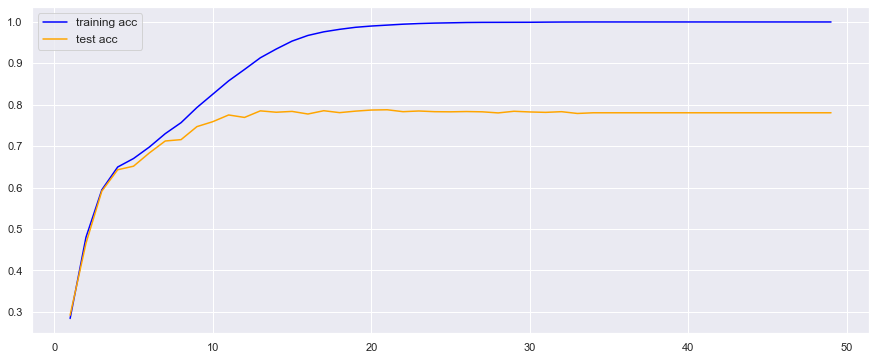

In [833]:
#Used to find optimal 'max_depth'

max_depth_range = range(1, 50)
error_results = []

# looping through values of max_depth
for max_depth in max_depth_range:
    
    # parameters
    dtc_parameters = {
        "max_depth": max_depth,
        "random_state": 17
    }

    # train
    dtc = tree.DecisionTreeClassifier(**dtc_parameters)
    dtc.fit(x_train, y_train)
    
    # predict
    y_hat_train = dtc.predict(x_train)  # prediction on the training set
    y_hat_test = dtc.predict(x_test)  # prediction on the test set
    
    # evaluate
    acc_train = accuracy_score(y_train, y_hat_train)  # accuracy achieved on the training data
    acc_test = accuracy_score(y_test, y_hat_test)  # accuracy achieved on the test data
    
    # store results
    error_results.append({
        "max_depth": max_depth, 
        "acc_train": acc_train,
        "acc_test": acc_test
    })
    
    # print evolution of loop:
    print(f"max_depth: {max_depth}, acc_train: {acc_train:.3f}, acc_test={acc_test:.3f}")
    
# saving results as dataframe
results = pd.DataFrame(error_results)

# plotting
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(results["max_depth"], results["acc_train"], label="training acc", color="blue")
ax.plot(results["max_depth"], results["acc_test"], label="test acc", color="orange")
ax.legend(fontsize=12)

plt.show()

min_sample_l: 1, min_sample_s: 2, acc_train: 0.993, acc_test=0.789
min_sample_l: 1, min_sample_s: 3, acc_train: 0.986, acc_test=0.781
min_sample_l: 1, min_sample_s: 4, acc_train: 0.978, acc_test=0.783
min_sample_l: 1, min_sample_s: 5, acc_train: 0.970, acc_test=0.778
min_sample_l: 2, min_sample_s: 2, acc_train: 0.956, acc_test=0.773
min_sample_l: 2, min_sample_s: 3, acc_train: 0.956, acc_test=0.773
min_sample_l: 2, min_sample_s: 4, acc_train: 0.956, acc_test=0.773
min_sample_l: 2, min_sample_s: 5, acc_train: 0.949, acc_test=0.774
min_sample_l: 3, min_sample_s: 2, acc_train: 0.937, acc_test=0.777
min_sample_l: 3, min_sample_s: 3, acc_train: 0.937, acc_test=0.777
min_sample_l: 3, min_sample_s: 4, acc_train: 0.937, acc_test=0.777
min_sample_l: 3, min_sample_s: 5, acc_train: 0.937, acc_test=0.777
min_sample_l: 4, min_sample_s: 2, acc_train: 0.915, acc_test=0.769
min_sample_l: 4, min_sample_s: 3, acc_train: 0.915, acc_test=0.769
min_sample_l: 4, min_sample_s: 4, acc_train: 0.915, acc_test=0

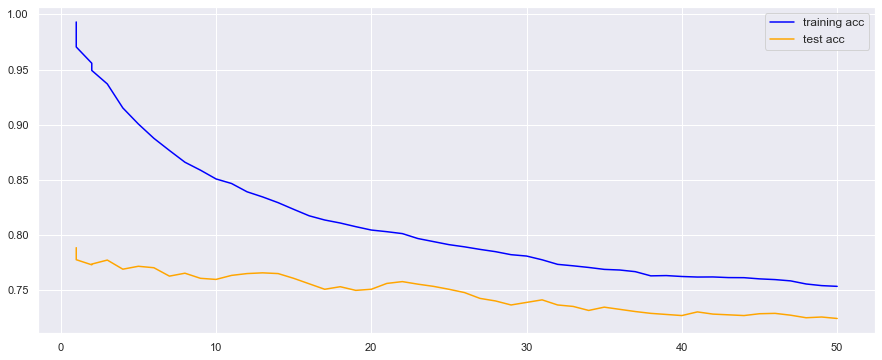

In [63]:
#Used optimal 'max_depth' found in the last code, but iterated through 'min_samples_leaf' and 'min_samples_split' to find optimal features

min_samples_leaf = range(1,51)
min_samples_split = [2, 3, 4, 5]
max_depth = 21
error_results = []

# looping through values of max_depth
for min_sample_l in min_samples_leaf:
    for min_sample_s in min_samples_split:
    
        # parameters
        dtc_parameters = {
            "min_samples_leaf": min_sample_l,
            "min_samples_split": min_sample_s,
            "max_depth": max_depth,
            "random_state": 17
        }

        # train
        dtc = tree.DecisionTreeClassifier(**dtc_parameters)
        dtc.fit(x_train, y_train)

        # predict
        y_hat_train = dtc.predict(x_train)  # prediction on the training set
        y_hat_test = dtc.predict(x_test)  # prediction on the test set

        # evaluate
        acc_train = accuracy_score(y_train, y_hat_train)  # accuracy achieved on the training data
        acc_test = accuracy_score(y_test, y_hat_test)  # accuracy achieved on the test data

        # store results
        error_results.append({
            "min_sample_l": min_sample_l,
            "min_sample_s": min_sample_s,
            "acc_train": acc_train,
            "acc_test": acc_test
        })

        # print evolution of loop:
        print(f"min_sample_l: {min_sample_l}, min_sample_s: {min_sample_s}, acc_train: {acc_train:.3f}, acc_test={acc_test:.3f}")
    
# saving results as dataframe
results = pd.DataFrame(error_results)

# plotting
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(results["min_sample_l"], results["acc_train"], label="training acc", color="blue")
ax.plot(results["min_sample_l"], results["acc_test"], label="test acc", color="orange")
ax.legend(fontsize=12)

plt.show()

In [45]:
#DecisionTree Classifier with Hyper-parameter Tuning
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=17, min_samples_leaf = 1, min_samples_split = 2, max_depth = 21)
dtc.fit(x_train, y_train)
y_hat = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_hat)
accuracy

0.7509920634920635

# 2. Random Forest

In [384]:
#parameter testing

rfc_parameters = {
    "n_estimators": 30,  # 30 trees in total
    "max_depth": 15,  # each tree is limited to grow to the 15th lvel
    "max_features": 0.7,  # each tree will be trained only with a random sample of 70% of the features 
    "random_state": 17 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(**rfc_parameters)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8449074074074074

In [385]:
#Used to find optimal parameters

pct_features = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
max_depths = [10, 15, 20, 25, 30]
trees_range = range(1,100,5)
error_results = []
results_mtx = np.zeros((len(max_depths), len(pct_features), len(trees_range)))

# looping through values of max_depth
for i, max_depth in enumerate(max_depths):
    for j, pct in enumerate(pct_features):
        for k, trees in enumerate(trees_range):
    
            # train
            rf = ensemble.RandomForestClassifier(
                n_estimators=trees, 
                random_state=17,
                max_depth=max_depth,
                max_features=pct
            )
            rf.fit(x_train, y_train)

            # predict
            y_hat_train = rf.predict(x_train)
            y_hat_test = rf.predict(x_test)

            # evaluate
            acc_train = accuracy_score(y_train, y_hat_train)
            acc_test = accuracy_score(y_test, y_hat_test)
            results_mtx[i, j] = acc_test

            # store results
            error_results.append({
                "pct_features": pct, 
                "max_depth": max_depth,
                "acc_train": acc_train,
                "acc_test": acc_test
            })

            # print evolution of loop:
            print(f"Max_features: {pct}, max_depth: {max_depth}, N_trees: {trees}, acc_train: {acc_train:.3f}, acc_test={acc_test:.3f}")
    
# saving results as dataframe
results = pd.DataFrame(error_results)

Max_features: 0.25, max_depth: 10, N_trees: 1, acc_train: 0.730, acc_test=0.687
Max_features: 0.25, max_depth: 10, N_trees: 6, acc_train: 0.835, acc_test=0.777
Max_features: 0.25, max_depth: 10, N_trees: 11, acc_train: 0.850, acc_test=0.783
Max_features: 0.25, max_depth: 10, N_trees: 16, acc_train: 0.859, acc_test=0.797
Max_features: 0.25, max_depth: 10, N_trees: 21, acc_train: 0.858, acc_test=0.803
Max_features: 0.25, max_depth: 10, N_trees: 26, acc_train: 0.862, acc_test=0.809
Max_features: 0.25, max_depth: 10, N_trees: 31, acc_train: 0.864, acc_test=0.806
Max_features: 0.25, max_depth: 10, N_trees: 36, acc_train: 0.865, acc_test=0.809
Max_features: 0.25, max_depth: 10, N_trees: 41, acc_train: 0.864, acc_test=0.808
Max_features: 0.25, max_depth: 10, N_trees: 46, acc_train: 0.863, acc_test=0.807
Max_features: 0.25, max_depth: 10, N_trees: 51, acc_train: 0.864, acc_test=0.806
Max_features: 0.25, max_depth: 10, N_trees: 56, acc_train: 0.863, acc_test=0.808
Max_features: 0.25, max_depth:

In [347]:
#Best RFC model

rfc_parameters = {
    "n_estimators": 76,
    "max_depth": 25,
    "max_features": 0.3,
    "random_state": 17 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(**rfc_parameters)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
acc_test = accuracy_score(y_test, y_hat)
acc_test

0.8637566137566137

# 3. XGBoost

In [205]:
x_train_XGB = x_train_scaled.drop(categorical_features, axis=1)

KeyError: "['Wilderness_Area1' 'Wilderness_Area2' 'Wilderness_Area3'\n 'Wilderness_Area4' 'Soil_Type1' 'Soil_Type2' 'Soil_Type3' 'Soil_Type4'\n 'Soil_Type5' 'Soil_Type6' 'Soil_Type7' 'Soil_Type8' 'Soil_Type9'\n 'Soil_Type10' 'Soil_Type11' 'Soil_Type12' 'Soil_Type13' 'Soil_Type14'\n 'Soil_Type15' 'Soil_Type16' 'Soil_Type17' 'Soil_Type18' 'Soil_Type19'\n 'Soil_Type20' 'Soil_Type21' 'Soil_Type22' 'Soil_Type23' 'Soil_Type24'\n 'Soil_Type25' 'Soil_Type26' 'Soil_Type27' 'Soil_Type28' 'Soil_Type29'\n 'Soil_Type30' 'Soil_Type31' 'Soil_Type32' 'Soil_Type33' 'Soil_Type34'\n 'Soil_Type35' 'Soil_Type36' 'Soil_Type37' 'Soil_Type38' 'Soil_Type39'\n 'Soil_Type40'] not found in axis"

In [204]:
x_test_XGB = x_test_scaled.drop(categorical_features, axis=1)

KeyError: "['Wilderness_Area1' 'Wilderness_Area2' 'Wilderness_Area3'\n 'Wilderness_Area4' 'Soil_Type1' 'Soil_Type2' 'Soil_Type3' 'Soil_Type4'\n 'Soil_Type5' 'Soil_Type6' 'Soil_Type7' 'Soil_Type8' 'Soil_Type9'\n 'Soil_Type10' 'Soil_Type11' 'Soil_Type12' 'Soil_Type13' 'Soil_Type14'\n 'Soil_Type15' 'Soil_Type16' 'Soil_Type17' 'Soil_Type18' 'Soil_Type19'\n 'Soil_Type20' 'Soil_Type21' 'Soil_Type22' 'Soil_Type23' 'Soil_Type24'\n 'Soil_Type25' 'Soil_Type26' 'Soil_Type27' 'Soil_Type28' 'Soil_Type29'\n 'Soil_Type30' 'Soil_Type31' 'Soil_Type32' 'Soil_Type33' 'Soil_Type34'\n 'Soil_Type35' 'Soil_Type36' 'Soil_Type37' 'Soil_Type38' 'Soil_Type39'\n 'Soil_Type40'] not found in axis"

In [206]:
y_train = np.where(y_train==1, 1, np.where(y_train==2, 2, np.where(y_train==3, 3, np.where(y_train==4, 4, np.where(y_train==5, 5, np.where(y_train==6, 6, np.where(y_train==7, 7, 0)))))))
y_test = np.where(y_test==1, 1, np.where(y_test==2, 2, np.where(y_test==3, 3, np.where(y_test==4, 4, np.where(y_test==5, 5, np.where(y_test==6, 6, np.where(y_test==7, 7, 0)))))))

In [103]:
y_train

array([2, 5, 4, ..., 6, 6, 3])

In [163]:
xgb = XGBClassifier(objective='multi:softmax', num_class=7)
xgb.fit(x_train_scaled, y_train)
y_hat_xgb = xgb.predict(x_test_scaled)
accuracy_score(y_test, y_hat_xgb)

C:\Users\ivanh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40

In [335]:
xgb = XGBClassifier(objective='multi:softmax', num_class=7)
xgb.fit(x_train, y_train)
y_hat_xgb = xgb.predict(x_test)
accuracy_score(y_test, y_hat_xgb)

[11:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8488756613756614

In [213]:
xgb_tuned = XGBClassifier( # labels are already encoded as [0, 1]
    objective='multi:softmax', # logistic regression for binary classification
    num_class=7,
    max_depth=5,  # depth of each tree
    subsample=0.3,  # sample of training data each tree will use
    n_estimators=500,  # total number of trees that will be created
    learning_rate=0.05  # how much each tree will learn 
)

xgb_tuned.fit(x_train_scaled, y_train)
y_hat_xgb = xgb.predict(x_test_scaled)
accuracy_score(y_test, y_hat_xgb)

C:\Users\ivanh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8478835978835979

### Getting Train Dataset ready to fit Model

In [906]:
x = train.iloc[:, :-1]
y = train.loc[:, "Cover_Type"]
#find_replace_outliers(x)
feature_engineering(x)

### Final Test

In [907]:
test = pd.read_csv("test_project.csv")
test = test.iloc[:,1:]
feature_engineering(test)

In [908]:
optimal_rfc_parameters = {
    "n_estimators": 83,
    "max_depth": 24,
    "max_features": 0.28,
    "random_state": 17 
}

rfc = RandomForestClassifier(**optimal_rfc_parameters)
rfc.fit(x, y)
Submition = pd.DataFrame(rfc.predict(test))
Submition

,0
0,2
1,1
2,1
3,2
4,2
...,...
565887,3
565888,3
565889,3
565890,3


In [910]:
Submition.to_csv("submition.csv")

In [ ]:
#pd.melt(df, id_vars=['A'], value_vars=['B'])
#x_test
#soil_nums = list(range(1,41))
#soil_cols = []
#for col in x_test.columns:
    #for num in soil_nums:
        #if col == f'Soil_Type{num}':
            #soil_cols.append(col)